# Differential Graded Vector Space

This encompasses chain complexes (differential is of degree -1) and cochain complexes (differential is of degree +1).

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time

## Levelset Filtrations

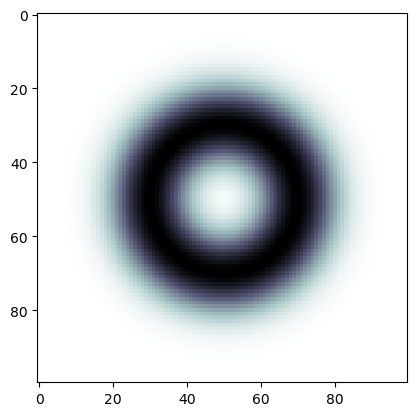

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
img = np.empty((n,n))

def rad(i,j, n):
    return np.sqrt((i - n/2)**2 + (j - n/2)**2)

for i in range(n):
    for j in range(n):
#         print(i,j, rad(i,j,n))
        img[i,j] = 1-np.exp(-(rad(i,j,n) - 20)**2/100)

plt.imshow(img, cmap='bone')
plt.show()

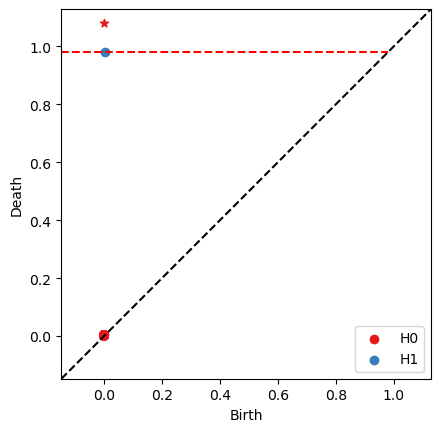

In [3]:
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

RF = bats.reduce(F, bats.F2())
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [4]:
flags = (bats.standard_reduction_flag(),bats.compute_basis_flag())

In [5]:
FC = bats.FilteredF2DGVectorSpace(F, -1)

RFC = bats.ReducedFilteredF2DGVectorSpace(FC, *flags)
for k in range(2):
    print("dim H{}: {}".format(k, RFC.hdim(k)))

dim H0: 1
dim H1: 0


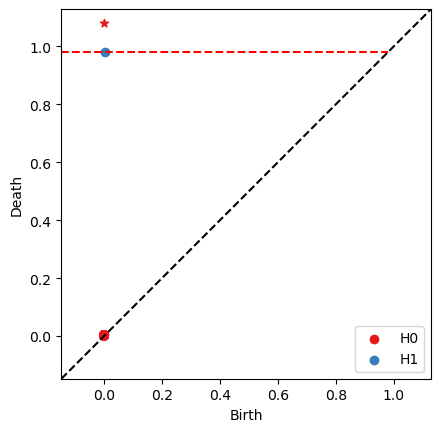

In [6]:
ps = RFC.persistence_pairs(0) + RFC.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [7]:
FC = bats.FilteredF2DGVectorSpace(F, +1)

In [8]:
RFC = bats.ReducedFilteredF2DGVectorSpace(FC, *flags)
for k in range(2):
    print("dim H{}: {}".format(k, RFC.hdim(k)))

dim H0: 1
dim H1: 0


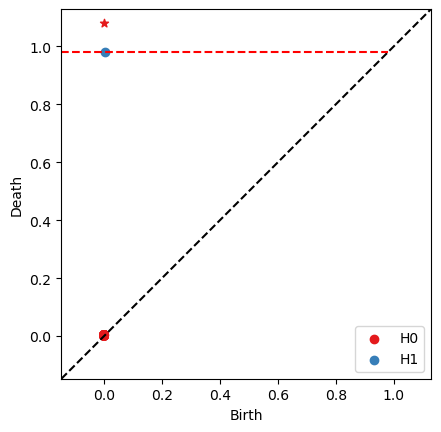

In [9]:
ps = RFC.persistence_pairs(0) + RFC.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

Compare run times

In [10]:
FC = dict()
RC = dict()
ps = dict()

flags = (bats.extra_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())

for deg in [-1, +1]:
    print("degree {:+d}".format(deg))
    
    t0 = time.monotonic()
    FC[deg] = bats.FilteredF2DGVectorSpace(F, deg)
    t1 = time.monotonic()
    print("construction: {} sec.".format(t1 - t0))
    
    t0 = time.monotonic()
    RC[deg] = bats.ReducedFilteredF2DGVectorSpace(FC[deg], *flags)
    t1 = time.monotonic()
    print("reduction: {} sec.".format(t1 - t0))
    
    ps[deg] = RC[deg].persistence_pairs(0) + RC[deg].persistence_pairs(1)
    

degree -1
construction: 0.009881235993816517 sec.
reduction: 0.025040877000719775 sec.
degree +1
construction: 0.016566723999858368 sec.
reduction: 0.037249864006298594 sec.


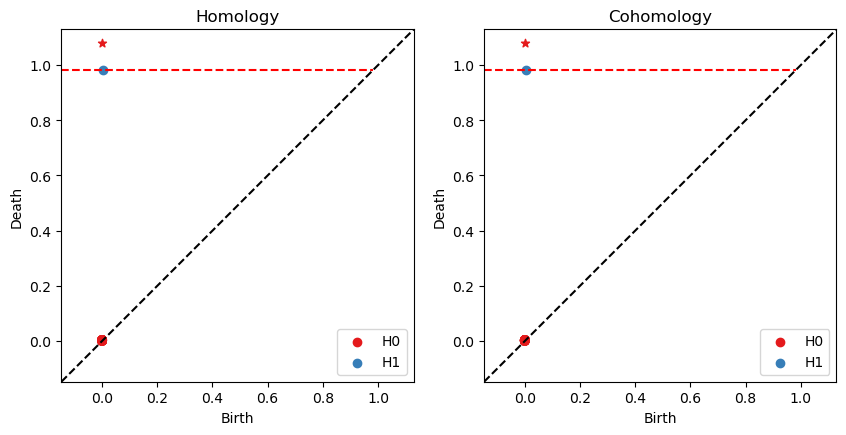

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
bats.persistence_diagram(ps[-1], ax=ax[0])
ax[0].set_title('Homology')
bats.persistence_diagram(ps[+1], ax=ax[1])
ax[1].set_title('Cohomology')
plt.show(fig)

### Updating Filtration

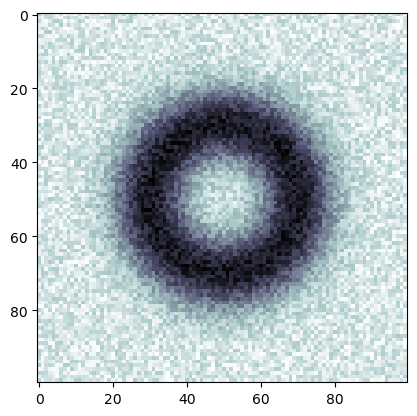

In [25]:
img2 = img + 0.3*np.random.rand(*(img.shape))

plt.imshow(img2, cmap='bone')
plt.show()

Using FilteredChainComplex

In [26]:
flags = (bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())

# original filtration
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

t0 = time.monotonic()
RF = bats.reduce(F, bats.F2(), *flags)
t1 = time.monotonic()
print("{:.3f} sec. to reduce".format(t1 - t0))
ps1 = RF.persistence_pairs(0) + RF.persistence_pairs(1)


vals2, imap2 = bats.lower_star_filtration(X, img2.flatten()) # computes filtration parameter to
t0 = time.monotonic()
RF.update_filtration(vals2)
t1 = time.monotonic()
print("{:.3f} sec. to update".format(t1 - t0))
ps2 = RF.persistence_pairs(0) + RF.persistence_pairs(1)

0.042 sec. to reduce
0.044 sec. to update


In [28]:
kd = 0
for k in range(3):
    perm1 = np.argsort(vals[k], kind='stable')
    perm2 = np.argsort(vals2[k], kind='stable')

    nperm = len(perm1)
    maxswaps = (nperm * (nperm-1)) // 2

    kt = bats.kendall_tau(perm1, perm2)
    print("k = {}, max: {}, kt: {}, ratio: {}".format(k, maxswaps, kt, kt/maxswaps))
    kd += kt

k = 0, max: 49995000, kt: 9883024, ratio: 0.19768024802480247
k = 1, max: 438094800, kt: 79822260, ratio: 0.18220316698577568
k = 2, max: 192109401, kt: 32623016, ratio: 0.16981478173470543


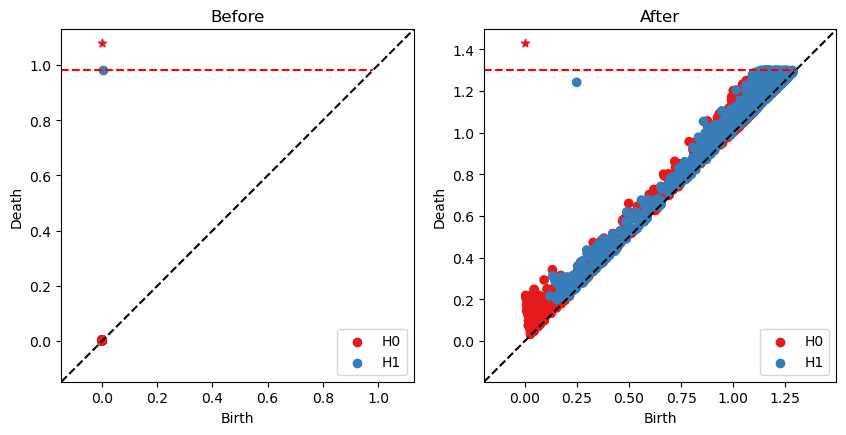

In [29]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
bats.persistence_diagram(ps1, ax=ax[0])
ax[0].set_title('Before')
bats.persistence_diagram(ps2, ax=ax[1])
ax[1].set_title('After')

plt.show(fig)

In [45]:
# flags = (bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())
flags = (bats.extra_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())

sigmas = np.logspace(-4, 0, 10)
tups = []
kts = []
for s in sigmas:
    print(s)
    img2 = img + s*np.random.rand(*(img.shape))
    # original filtration
    X = bats.Freudenthal(n, n)
    vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
    F = bats.Filtration(X, vals)

    t0 = time.monotonic()
    RF = bats.reduce(F, bats.F2(), *flags)
    t1 = time.monotonic()
    print("\t{:.3f} sec. to reduce".format(t1 - t0))
    ps1 = RF.persistence_pairs(0) + RF.persistence_pairs(1)


    vals2, imap2 = bats.lower_star_filtration(X, img2.flatten()) # computes filtration parameter to
    t0 = time.monotonic()
    RF.update_filtration(vals2)
    t1 = time.monotonic()
    print("\t{:.3f} sec. to update".format(t1 - t0))
    tups.append(t1 - t0)
    ps2 = RF.persistence_pairs(0) + RF.persistence_pairs(1)
    
    kd = 0
    mswaps = 0
    for k in range(3):
        perm1 = np.argsort(vals[k], kind='stable')
        perm2 = np.argsort(vals2[k], kind='stable')

        nperm = len(perm1)
        maxswaps = (nperm * (nperm-1)) // 2

        kt = bats.kendall_tau(perm1, perm2)
        print("\t\tk = {}, max: {}, kt: {}, ratio: {}".format(k, maxswaps, kt, kt/maxswaps))
        kd += kt
        mswaps += maxswaps
        
    kts.append(kd / mswaps)
    print("\toverall ratio: {}".format(kd /mswaps))


0.0001
	0.046 sec. to reduce
	0.024 sec. to update
		k = 0, max: 49995000, kt: 733956, ratio: 0.01468058805880588
		k = 1, max: 438094800, kt: 5653742, ratio: 0.01290529355746747
		k = 2, max: 192109401, kt: 2233203, ratio: 0.011624641940349395
	overall ratio: 0.012674082808868222
0.0002782559402207126
	0.042 sec. to reduce
	0.032 sec. to update
		k = 0, max: 49995000, kt: 1127384, ratio: 0.02254993499349935
		k = 1, max: 438094800, kt: 8617232, ratio: 0.01966978836544054
		k = 2, max: 192109401, kt: 3411952, ratio: 0.01776046347674573
	overall ratio: 0.019342227954190144
0.000774263682681127
	0.040 sec. to reduce
	0.037 sec. to update
		k = 0, max: 49995000, kt: 1684539, ratio: 0.0336941494149415
		k = 1, max: 438094800, kt: 13000507, ratio: 0.029675100001186956
		k = 2, max: 192109401, kt: 5130853, ratio: 0.026707974587875584
	overall ratio: 0.029132493791329813
0.002154434690031882
	0.042 sec. to reduce
	0.042 sec. to update
		k = 0, max: 49995000, kt: 2445471, ratio: 0.048914311431

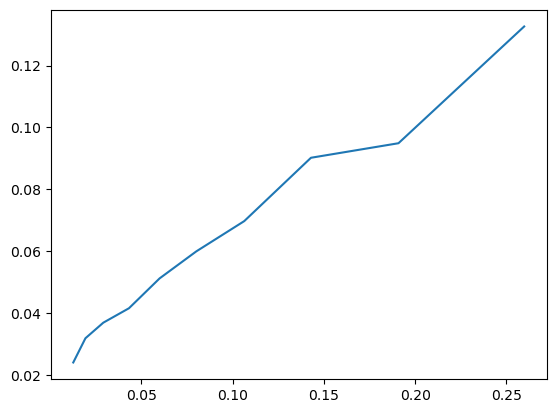

In [46]:
plt.plot(kts, tups)
plt.show()

Using FilteredDGVS

In [ ]:
degree = +1
flags = (bats.standard_reduction_flag(), bats.clearing_flag(), bats.compute_basis_flag())

# original filtration
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to
F = bats.Filtration(X, vals)

t0 = time.monotonic()
CF = bats.FilteredF2DGVectorSpace(F, degree)
RF = bats.ReducedFilteredF2DGVectorSpace(CF, *flags)
t1 = time.monotonic()
print("{:.3f} sec. to reduce".format(t1 - t0))
tred = t1 - t0
ps1 = RF.persistence_pairs(0) + RF.persistence_pairs(1)


vals2, imap2 = bats.lower_star_filtration(X, img2.flatten()) # computes filtration parameter to
t0 = time.monotonic()
RF.update_filtration(vals2)
t1 = time.monotonic()
tup = t1 - t0
print("{:.3f} sec. to update".format(t1 - t0))
ps2 = RF.persistence_pairs(0) + RF.persistence_pairs(1)

print("update / reduction: {}".format(tup/tred))

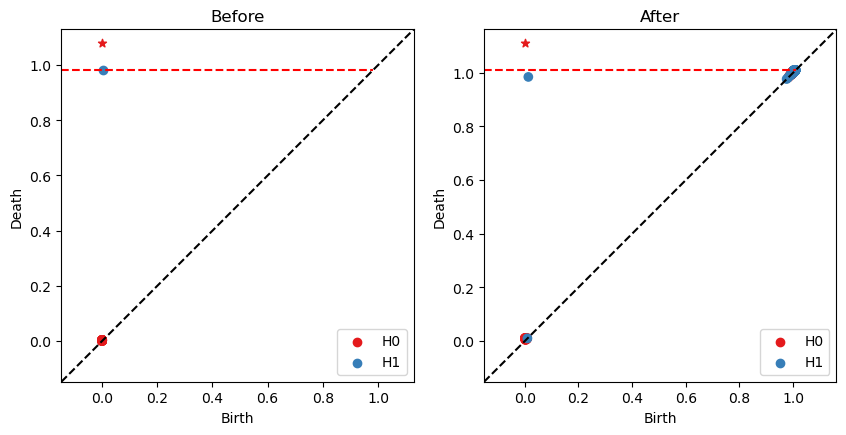

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
bats.persistence_diagram(ps1, ax=ax[0])
ax[0].set_title('Before')
bats.persistence_diagram(ps2, ax=ax[1])
ax[1].set_title('After')

plt.show(fig)

### Compute Kendall-Tau distance

In [29]:
?np.argsort

In [30]:
for k in range(3):
    perm1 = np.argsort(vals[k], kind='stable')
    perm2 = np.argsort(vals2[k], kind='stable')

    nperm = len(perm1)
    maxswaps = (nperm * (nperm-1)) // 2

    kt = bats.kendall_tau(perm1, perm2)
    print("k = {}, max: {}, kt: {}, ratio: {}".format(k, maxswaps, kt, kt/maxswaps))

k = 0, max: 49995000, kt: 3938331, ratio: 0.07877449744974498
k = 1, max: 438094800, kt: 31017019, ratio: 0.07079978808239677
k = 2, max: 192109401, kt: 12392110, ratio: 0.0645054845598108


In [26]:
perm1 = np.arange(100)
perm2 = np.array(perm1, copy=True)
perm2[[0,1]] = perm2[[1,0]]
perm3 = np.array(perm2, copy=True)
perm3[[1,2]] = perm3[[2,1]]

In [28]:
print(bats.kendall_tau(perm1, perm2))
print(bats.kendall_tau(perm2, perm3))
print(bats.kendall_tau(perm1, perm3))

1
1
2


In [19]:
permdiff = perm1[perm2]

In [22]:
bats.kendall_tau(permdiff)

25112369

In [21]:
bats.kendall_tau(permdiff) / maxswaps

0.5022976097609761

In [27]:
perm1 = np.arange(100)
perm1 = perm1[::-1]
bats.kendall_tau(perm1)

4950

array([4930, 7049, 7052, ..., 8408, 9602,  686])

In [ ]:
bats.kendall_tau()

## Rips Filtrations

In [ ]:
n = 100
np.random.seed(0)
X = np.random.normal(size=(n,2))
X = X / np.linalg.norm(X, axis=1).reshape(-1,1)
X = X + np.random.normal(size=(n,2), scale = 0.1 )
fig = plt.scatter(X[:,0], X[:,1])
fig.axes.set_aspect('equal')
plt.show(fig)

# Filtered DGVS

In [ ]:
R = bats.RipsFiltration(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), np.inf, 2)
t0 = time.monotonic()
RR = bats.reduce(R, bats.F2(), bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

In [ ]:
ps = RR.persistence_pairs(0) + RR.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [ ]:
for p in ps:
    if p.length() > 0.5:
        print(p)

In [ ]:
t0 = time.monotonic()
RC = bats.FilteredF2DGVectorSpace(R, +1)
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

In [ ]:
t0 = time.monotonic()
RRC = bats.ReducedFilteredF2DGVectorSpace(RC, bats.standard_reduction_flag(), bats.clearing_flag())
t1 = time.monotonic()
print("{} sec. elapsed".format(t1 - t0))

In [ ]:
for k in range(2):
    print("dim H{}: {}".format(k, RRC.hdim(k)))

In [ ]:
ps = RRC.persistence_pairs(0) + RRC.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [ ]:
for p in ps:
    if p.length() > 0.5:
        print(p)

# DGVS

In [ ]:
R = bats.RipsComplex(bats.DataSet(bats.Matrix(X)), bats.Euclidean(), 0.7, 2)
for k in range(R.maxdim() + 1):
    print("{}: {}".format(k, R.ncells(k)))

In [ ]:
bats.reset_field_ops()
bats.reset_column_ops()
bats.get_field_ops(), bats.get_column_ops()

In [ ]:
RC = bats.F2DGVectorSpace(R, -1, True) # augmented chain complex
t0 = time.monotonic()
RRC = bats.ReducedF2DGVectorSpace(RC)
t1 = time.monotonic()
print("{:.2f} sec.".format(t1 - t0))
for k in range(RRC.maxdim()):
    print("dim H_{} = {}".format(k, RRC.hdim(k)))

In [ ]:
chainops, chaincols = bats.get_field_ops(), bats.get_column_ops()

In [ ]:
%timeit RRC = bats.ReducedF2DGVectorSpace(RC)

In [ ]:
bats.reset_field_ops()
bats.reset_column_ops()
bats.get_field_ops(), bats.get_column_ops()

In [ ]:
RC = bats.F2DGVectorSpace(R, +1, True) # cochain complex
t0 = time.monotonic()
RRC = bats.ReducedF2DGVectorSpace(RC)
t1 = time.monotonic()
print("{:.2f} sec.".format(t1 - t0))
for k in range(RRC.maxdim()):
    print("dim H_{} = {}".format(k, RRC.hdim(k)))

In [ ]:
cochainops, cochaincols = bats.get_field_ops(), bats.get_column_ops()

In [ ]:
%timeit RRC = bats.ReducedF2DGVectorSpace(RC)

In [ ]:
print("cochain / chain ops : {}".format(cochainops / chainops))
print("cochain / chain cols : {}".format(cochaincols / chaincols))

In [ ]:
RC.degree

In [ ]:
bats.ReducedF2DGVectorSpace?

In [ ]:
?bats.F2DGVectorSpace